In [24]:
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [10]:
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.load_data import load_waveform
from gw_eccentricity.plot_settings import labelsDict

In [7]:
data_dir = '/home/arif/egw_precessing_paper/data/AEI_Eccentric/BBH_SKS_q6__0.8_0._0._0.__0._0._0.__e0.7__D45/Lev3/'

In [8]:
nr_wf_kwargs = {
        "data_dir": data_dir, "mode_array": [(2, -2), (2, -1), (2, 0), (2, 1), (2, 2)], "include_params_dict": True}
data_dict = load_waveform(origin="SXSCatalog", **nr_wf_kwargs)

In [9]:
return_dict = measure_eccentricity(
        dataDict=data_dict,
        tref_in=data_dict["t"],
        method="AmplitudeFits",
        precessing=True,
    )
gwecc_obj = return_dict["gwecc_object"]

/home/arif/gw_eccentricity/gw_eccentricity/eccDefinition.py:433: UserWarning: kw params_dict is not a recognized key word in dataDict.
  debug_message(


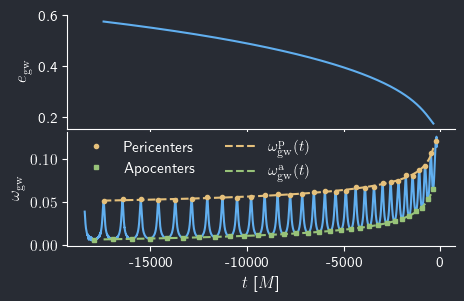

In [64]:
# Dark theme settings
plt.style.use('dark_theme.mplstyle')
# Set color cycle in code
colors = ['#61AFEF', '#E5C07B', '#98C379', '#C678DD', '#E06C75']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

fig, axes = plt.subplots(nrows=2,figsize=(5,3), sharex=True)
axes[0].plot(gwecc_obj.tref_out, gwecc_obj.eccentricity, c=colors[0])
axes[1].plot(gwecc_obj.t, gwecc_obj.dataDict["omegalm"][(2,2)], c=colors[0])
axes[1].plot(gwecc_obj.t[gwecc_obj.pericenters_location],
             gwecc_obj.dataDict["omegalm"][(2,2)][gwecc_obj.pericenters_location],
             marker=".", ls="", c=colors[1], label=labelsDict["pericenters"])
axes[1].plot(gwecc_obj.t[gwecc_obj.apocenters_location],
             gwecc_obj.dataDict["omegalm"][(2,2)][gwecc_obj.apocenters_location],
             marker="s", markersize=3, ls="", c=colors[2], label=labelsDict["apocenters"])

axes[1].plot(gwecc_obj.tref_out,
             gwecc_obj.omega_gw_pericenters_interp(gwecc_obj.tref_out),
             c=colors[1], ls="--", label=labelsDict["omega_gw_pericenters"] + "$(t)$")
axes[1].plot(gwecc_obj.tref_out,
             gwecc_obj.omega_gw_apocenters_interp(gwecc_obj.tref_out),
             c=colors[2], ls="--", label=labelsDict["omega_gw_apocenters"] + "$(t)$")

axes[1].legend(ncols=2, loc="upper left", bbox_to_anchor=(0,1.05), frameon=False)
axes[1].set_xlabel(labelsDict["t_dimless"])
axes[0].set_ylabel(labelsDict["eccentricity"])
axes[1].set_ylabel(labelsDict["omega_gw"])

yticks = [0.2, 0.4, 0.6]
yticklabels = [f"{y:.1f}" for y in yticks]
axes[0].set_yticks(yticks)
axes[0].set_yticklabels(yticklabels)

#yticks = [-0.1, 0.0, 0.1]
#yticklabels = [f"{y:.1f}" for y in yticks]
#axes[1].set_yticks(yticks)
#axes[1].set_yticklabels(yticklabels)

xticks = [-15000, -10000, -5000, 0]
xticklabels = [f"{x}" for x in xticks]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.subplots_adjust(hspace=0.025)
fig.savefig("../../assets/research/defining_eccentricity/definitions-dark.svg", bbox_inches='tight')